In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Explore data


In [19]:
df = pd.read_excel('../My_Datas/Data/Student Grades.xlsx')

In [69]:
df[df.Grade > 100]

AttributeError: 'DataFrame' object has no attribute 'Grade'

In [21]:
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [22]:
df.Class = np.where(df.Class == 'EDA', 'Exploratory Data Analysis', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
81                          NaN
82                          NaN
83    Exploratory Data Analysis
84    Exploratory Data Analysis
85                          NaN
Name: Class, Length: 86, dtype: object

In [23]:
df.Class = np.where(df.Class == 'Python', 'Intro to Python', df.Class)
df.Class

0              Freshman Seminar
1              Freshman Seminar
2              Freshman Seminar
3              Freshman Seminar
4              Freshman Seminar
                ...            
81                          NaN
82                          NaN
83    Exploratory Data Analysis
84    Exploratory Data Analysis
85                          NaN
Name: Class, Length: 86, dtype: object

In [7]:
df.Grade = np.where(df.Grade > 100, 100, df.Grade)
df.Grade

0      86.0
1      86.0
2      86.0
3      87.0
4      90.0
      ...  
81      NaN
82      NaN
83     84.0
84      NaN
85    100.0
Name: Grade, Length: 86, dtype: float64

In [8]:
df.Grade.describe()

count     82.000000
mean      84.487805
std        8.991414
min       45.000000
25%       81.000000
50%       85.000000
75%       90.000000
max      100.000000
Name: Grade, dtype: float64

In [53]:
df_grades = pd.read_excel('../My_Datas/Data/Student Grades.xlsx')

In [54]:
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [55]:
df_grades.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
EDA                          13
Freshman Seminar             12
Exploratory Data Analysis    12
Python                        1
Name: count, dtype: int64

In [9]:
run_times = df = pd.read_excel('../My_Datas/Data/Run Times.xlsx')

In [10]:
run_times

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


## Duplicate Data



In [56]:
df_grades.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


## Outliers

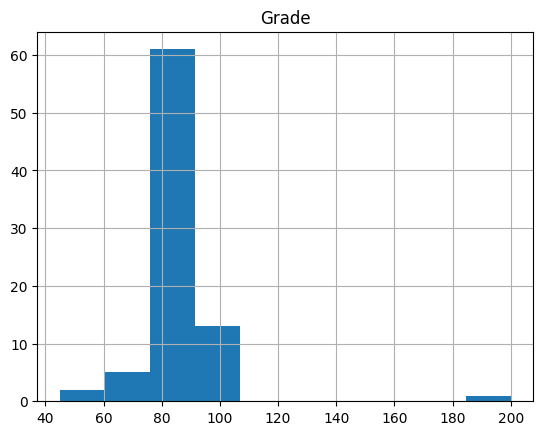

In [57]:
df_grades.hist();

In [58]:
df_grades.Grade.max() - df_grades.Grade.min()

155.0

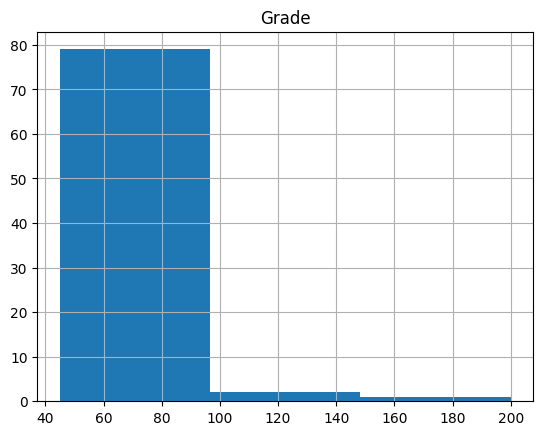

In [59]:
df_grades.hist(bins=3);

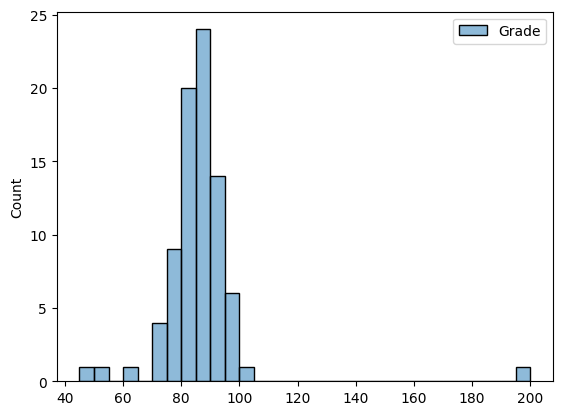

In [60]:
sns.histplot(df_grades, binwidth=5);

<Axes: xlabel='Grade'>

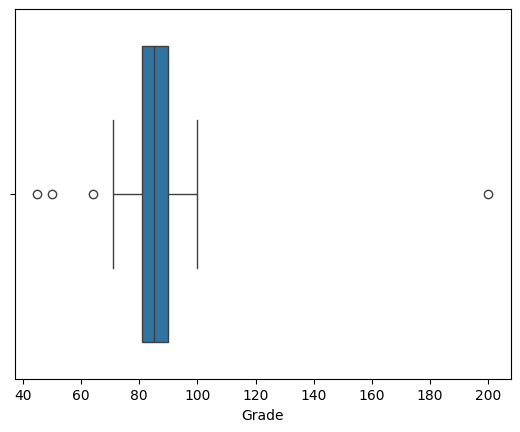

In [63]:
sns.boxplot(x=df_grades.Grade)

In [25]:
q25, q50, q75 = np.percentile(df.Grade, (25, 50, 75))

In [26]:
iqr = q75 - q25

In [27]:
min_grade = q25 - 1.5*iqr
max_grade = q25 + 1.5*iqr

## Standard Deviation

In [34]:
mean = np.mean(df.Grade)
sd = np.std(df.Grade)

In [35]:
mean, sd

(85.70731707317073, 15.432376328465006)

In [42]:
[grade for grade in df.Grade if(grade < mean - 2*sd) or (grade > mean + 2*sd)]

[50.0, 45.0, 200.0]

In [ ]:
df.Grade.iloc(69)

## Handling Outliers


In [70]:
df = pd.read_excel('../My_Datas/Data/Student Grades.xlsx')

In [74]:
df[df.Grade < 60]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0


In [88]:
df.loc[[37, 56]]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0
56,Wyatt,Intro to SQL,Sophomore,64.0


In [75]:
df.drop([37, 56])

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


In [77]:
df[df.Grade >= 60]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
78,Charles,EDA,Junior,93.0
79,Connor,EDA,Junior,91.0
80,Riley,EDA,Junior,87.0
83,NaN,EDA,Junior,84.0


In [87]:
df[df.Grade < 60]

,Student,Class,Year,Grade


In [84]:
min_grade = df[df.Grade >= 60].Grade.min()
min_grade

64.0

In [86]:
df.Grade = np.where(df.Grade < 60, min_grade, df.Grade)

In [91]:
df[df.Student == 'John']

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,74.0


In [90]:
df.loc[37, 'Grade'] = 74

## Creating new columns



In [3]:
groceries = pd.read_excel('../My_Datas/Data/Groceries.xlsx')

In [5]:
groceries.head(20)


,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15
5,P100015,Produce: Fruit,Watermelon,5.99,99,2023-06-12 19:15:00,2023-06-15
6,P100016,Produce: Vegetable,Cabbage,1.78,78,2023-06-12 19:25:00,2023-06-15
7,P100017,Produce: Vegetable,Carrots,2.00,200,2023-06-12 18:05:00,2023-06-15
8,P100018,Produce: Vegetable,Celery,1.99,50,2023-06-12 16:42:00,2023-06-15
9,P100019,Produce: Vegetable,Cucumber,0.99,230,2023-06-12 17:47:00,2023-06-15


In [6]:
groceries['New Column'] = round(groceries.Price_Dollars * 1.05, 2)

In [7]:
groceries["Total Inventory"] = groceries.Inventory.sum()

In [8]:
groceries["Percent Inventory Column"] = round(groceries["Inventory"] / groceries["Total Inventory"] * 100, 2)

In [9]:
groceries["Low Inventory"] = np.where(groceries.Inventory < 50, 'Low inventory', '')

In [11]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory Column,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.19,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.29,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.12,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.03,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.05,


In [44]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory Column,Low Inventory,Last_Update_Time,Shipment_Date_NOW,New_Shipement_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,1970-01-01 00:00:00.000000003,1.58,4857,7.19,,15:35:00,Thursday,1970-01-02 00:00:00.000000003
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,1970-01-01 00:00:00.000000003,0.42,4857,10.29,,18:30:00,Thursday,1970-01-02 00:00:00.000000003
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,1970-01-01 00:00:00.000000003,4.20,4857,4.12,,17:22:00,Thursday,1970-01-02 00:00:00.000000003
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,1970-01-01 00:00:00.000000003,1.04,4857,1.03,,16:29:00,Thursday,1970-01-02 00:00:00.000000003
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,1970-01-01 00:00:00.000000003,4.19,4857,3.05,,18:10:00,Thursday,1970-01-02 00:00:00.000000003


In [27]:
groceries['Last_Update_Time'] = groceries.Last_Updated.dt.time

In [36]:
groceries['Next_Scheduled_Shipment'] = pd.to_datetime(groceries['Next_Scheduled_Shipment'])

In [37]:
groceries['Shipment_Date_NOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek

In [38]:
dow_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}
              

In [40]:
groceries['Shipment_Date_NOW'] = groceries['Shipment_Date_NOW'].map(dow_mapping)

In [43]:
groceries['New_Shipement_Date'] = groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D')

## Extracting text


In [4]:
df = pd.read_excel('../My_Datas/Data/Groceries.xlsx')

In [34]:
df.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Product_Number,Subcategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,100014,Fruit


In [16]:
df['Product_Number'] = df.Product_ID.str[1:]

In [35]:
df['Product_Number'] = df['Product_Number'].astype('int')

In [ ]:
df[['Category', 'Subcategory']] = pd.DataFrame(df.Category.str.split(':').to_list())

In [43]:
df.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,Product_Number,Subcategory,Organic
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,100010,Fruit,False
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,100011,Fruit,False
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,100012,Fruit,False
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,100013,Fruit,False
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,100014,Fruit,True


In [42]:
df['Organic'] = df.Item.str.lower().str.contains('organic|organic', regex=True)